# Numerical Method to obtain Optimized Portfolio using SSD constraints benchmark against equally weighted portfolio

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import datetime
from pprint import pprint
from src.datasource.yahoodata import YahooDataSource
from matplotlib import pyplot as plt

In [2]:
def calculate_second_order_dominance(X):
    
    V_x = []
    for eta in X:
        v_j_x = np.sum((eta-X)[X< eta])/(len(X))
        V_x.append(v_j_x)

    return V_x

In [3]:
start_date = datetime.datetime(2022,8,1)
end_date = datetime.datetime(2023,1,1)

# Pull Data

In [4]:
tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK','PFE','GOOGL','META','NFLX','DIS','VZ','T','WMT','KO','PEP','PG','JNJ','UNH','V','MA','HD','NKE','INTC','CMCSA','ADBE','CRM','NFLX','INTU','QCOM','TXN','AVGO','AMD','HON','IBM','MDLZ']

column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2022,8,8)
end_date = datetime.datetime(2023,1,1)
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()


Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK
Adding PFE to the data source
Getting data for PFE
Adding GOOGL to the data source
Getting data for GOOGL
Adding META to the data source
Getting data for META
Adding NFLX to the data source
Getting data for NFLX
Adding DIS to the data source
Getting data for DIS
Adding VZ to the data source
Getting data for VZ
Adding T to the data source
Getting data for T
Adding WMT to the data source
Getting data for WMT
Adding KO to th

c:\Users\aayus\Documents\GitHub\StochasticDominancePortfolioOptimization\src\datasource\yahoodata.py:49: UserWarning: NFLX already exists in the data source
  warnings.warn(f"{ticker} already exists in the data source")
c:\Users\aayus\Documents\GitHub\StochasticDominancePortfolioOptimization\src\datasource\yahoodata.py:49: UserWarning: IBM already exists in the data source
  warnings.warn(f"{ticker} already exists in the data source")


,MSFT,MMM,AXP,AMGN,AAPL,CSCO,IBM,NVDA,TSLA,AMZN,...,CMCSA,ADBE,CRM,INTU,QCOM,TXN,AVGO,AMD,HON,MDLZ
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-09,275.821686,109.683922,153.684647,227.792404,162.754532,41.538548,116.859665,17.062572,283.333344,137.830002,...,35.374622,426.570007,181.227768,454.381989,133.773651,164.984848,50.552776,95.540001,183.121124,60.090405
2022-08-10,282.524323,110.826439,157.207428,231.213501,167.017807,42.555744,118.691925,18.072189,294.356659,142.690002,...,36.116234,438.399994,187.562393,470.135498,137.979019,170.007446,52.223644,99.050003,186.083710,60.597969
2022-08-11,280.433441,111.034187,157.739700,227.783249,166.277679,42.444782,119.630638,17.917400,286.630005,140.639999,...,36.524113,434.890015,185.692825,470.804169,138.767517,169.023346,51.751129,98.120003,188.226593,60.428772
2022-08-12,285.211243,112.948318,160.497864,227.819931,169.840240,43.101326,120.957458,18.683350,300.029999,143.550003,...,37.080318,445.670013,188.835281,478.562897,142.015396,172.105606,52.965603,100.830002,190.464325,60.344185
2022-08-13,285.211243,112.948318,160.497864,227.819931,169.840240,43.101326,120.957458,18.683350,300.029999,143.550003,...,37.080318,445.670013,188.835281,478.562897,142.015396,172.105606,52.965603,100.830002,190.464325,60.344185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,234.405426,91.102127,142.827255,245.613342,130.344482,44.313663,129.377701,15.193551,123.150002,85.250000,...,32.864754,338.450012,128.721039,378.807190,105.296051,153.826126,53.295818,64.519997,203.783997,63.490440
2022-12-27,232.667496,91.162804,142.215240,245.120102,128.535522,44.360321,130.080994,14.109439,109.099998,83.040001,...,32.733826,335.089996,129.934265,377.447571,103.985077,153.264664,53.402905,63.270000,204.755890,63.859459
2022-12-28,230.281494,89.699265,139.903107,243.286743,124.591385,43.931004,127.888939,14.024508,112.709999,81.820000,...,32.378418,328.329987,127.756432,370.935333,101.619637,150.840958,52.568398,62.570000,202.183228,63.234970


In [5]:
returns = data.pct_change().dropna().T.to_numpy()

In [6]:
assets = len(returns[:,0])
senarios = len(returns[0,:])

In [7]:
mean_returns= np.resize(returns.mean(axis=1),(assets,1))
print("mean",mean_returns)

mean [[-1.32301622e-03]
 [-1.67958273e-03]
 [-4.87140779e-04]
 [ 8.19932642e-04]
 [-2.09056476e-03]
 [ 8.21617173e-04]
 [ 1.07183645e-03]
 [-8.40146524e-04]
 [-7.56388971e-03]
 [-4.54524817e-03]
 [ 2.37071709e-03]
 [ 5.01944706e-04]
 [-2.49492681e-03]
 [-2.51797629e-03]
 [ 3.13068305e-03]
 [-1.82984128e-03]
 [-9.87484078e-04]
 [ 4.66759109e-04]
 [ 1.14142051e-03]
 [ 2.98238027e-04]
 [ 5.46218704e-04]
 [ 5.82945312e-04]
 [ 5.55755959e-04]
 [ 2.14669030e-05]
 [ 5.58679405e-05]
 [ 2.16998666e-04]
 [ 6.66571375e-04]
 [ 1.08858777e-03]
 [-2.21886702e-03]
 [-5.85645134e-04]
 [-1.91481519e-03]
 [-2.79356840e-03]
 [-1.29859688e-03]
 [-2.09930883e-03]
 [-4.46410758e-04]
 [ 9.16109976e-04]
 [-3.24204952e-03]
 [ 1.20450153e-03]
 [ 6.18238669e-04]]


In [8]:
# Compute of E(max(0,n-y))
Y_weights = (1/assets)*(np.ones((assets,1)))
Y_returns = np.sort(((returns.T)@Y_weights).flatten())
V = []
for eta in Y_returns:
    v_j = np.sum((eta-Y_returns)[Y_returns< eta])/(len(Y_returns))
    V.append(v_j)

In [9]:
weights  = cp.Variable(shape=(assets,1),name="weights")
S = cp.Variable(shape=(senarios,senarios),name="slack")
X_returns = returns.T@weights

# SSD Contraints
constraints = []
for j,eta in enumerate(Y_returns):
    for i,x in enumerate(X_returns):
        constraints.append(x+S[i,j]>=eta)

for j,v_j in enumerate(V):
    constraints.append((1/(len(Y_returns)))*cp.sum(S[:,j])<=v_j)

# Portfolio Constraints
constraints.extend([cp.sum(weights)==1,S>=0,weights>=0])

objective = cp.Maximize((mean_returns.T@weights))
problem = cp.Problem(objective, constraints)
problem.solve()

0.0026549097593947524

In [10]:
X_sd = np.sort(returns.T@weights.value.flatten())
Y_sd = np.sort(returns.T@Y_weights.flatten())

Text(0.5, 0, 'Portfolio Returns')

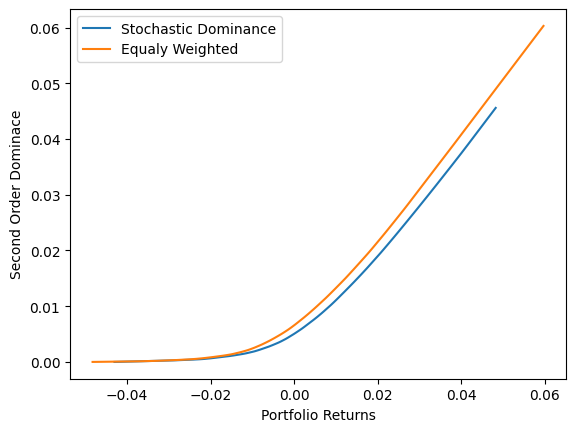

In [11]:
plt.plot(X_sd,calculate_second_order_dominance(X_sd),label="Stochastic Dominance")
plt.plot(Y_sd,calculate_second_order_dominance(Y_sd),label="Equaly Weighted")
plt.legend()
plt.ylabel('Second Order Dominace')
plt.xlabel('Portfolio Returns')

In [12]:
print("Second order Stochastic Dominance Weights",weights.value.flatten())
print("Equally Weighted Weights",Y_weights.flatten())
plt.show()

Second order Stochastic Dominance Weights [ 6.97583652e-12  6.56124594e-12  1.07799881e-11  2.33433872e-11
  4.73807327e-12  2.22986891e-11  2.75230583e-11  7.49434238e-12
 -1.81338923e-13  1.52300876e-12  6.26045527e-01  1.99796442e-11
  4.02625896e-12  3.59391770e-12  3.73954473e-01  5.82094978e-12
  1.01653359e-11  1.99297775e-11  1.05989782e-10  1.84348227e-11
  2.04483637e-11  2.59754112e-11  2.26098070e-11  1.47546821e-11
  1.48485955e-11  1.56419311e-11  1.94428328e-11  2.62316126e-11
  4.47564766e-12  9.84926536e-12  5.17901225e-12  3.82224788e-12
  6.50951638e-12  4.78113649e-12  1.07391692e-11  2.42193175e-11
  2.72021227e-12  3.22768309e-11  2.24082973e-11]
Equally Weighted Weights [0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564

Text(0, 0.5, 'Portfolio Returns')

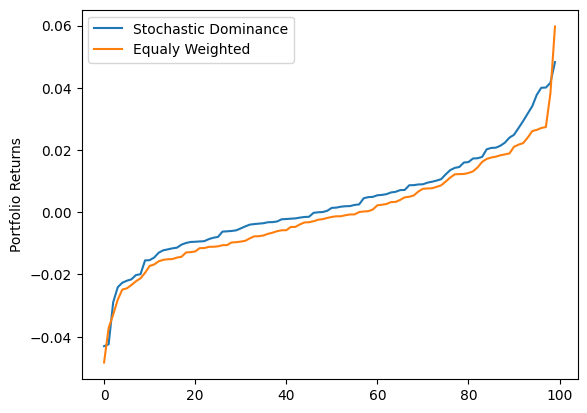

In [13]:
plt.plot(X_sd,label="Stochastic Dominance")
plt.plot(Y_sd,label="Equaly Weighted")
plt.legend()
plt.ylabel('Portfolio Returns')

In [14]:
print("Mean Return on  Stochastic Dominance",np.average(X_sd))
print("Mean Return on Equally Weighted",np.average(Y_sd))

Mean Return on  Stochastic Dominance 0.0026549097593947524
Mean Return on Equally Weighted -0.0006118632692746982


In [15]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
